In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

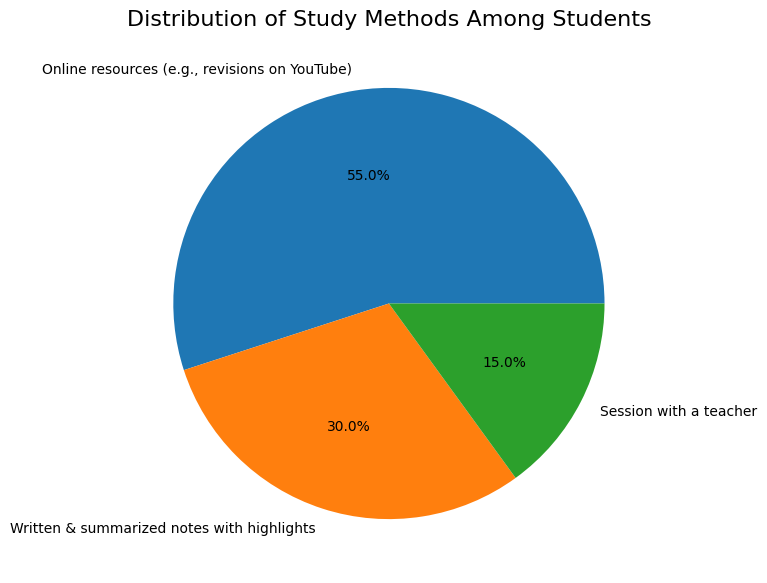

In [3]:
# Pie Chart part for visualizing the "Distribution of Study Methods Among Students"
df = pd.read_csv("responses.csv")
study_method_counts = df["Study Method"].value_counts()
plt.figure(figsize=(8,7))
plt.pie(study_method_counts, labels=study_method_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Study Methods Among Students", fontsize=16)
plt.show()

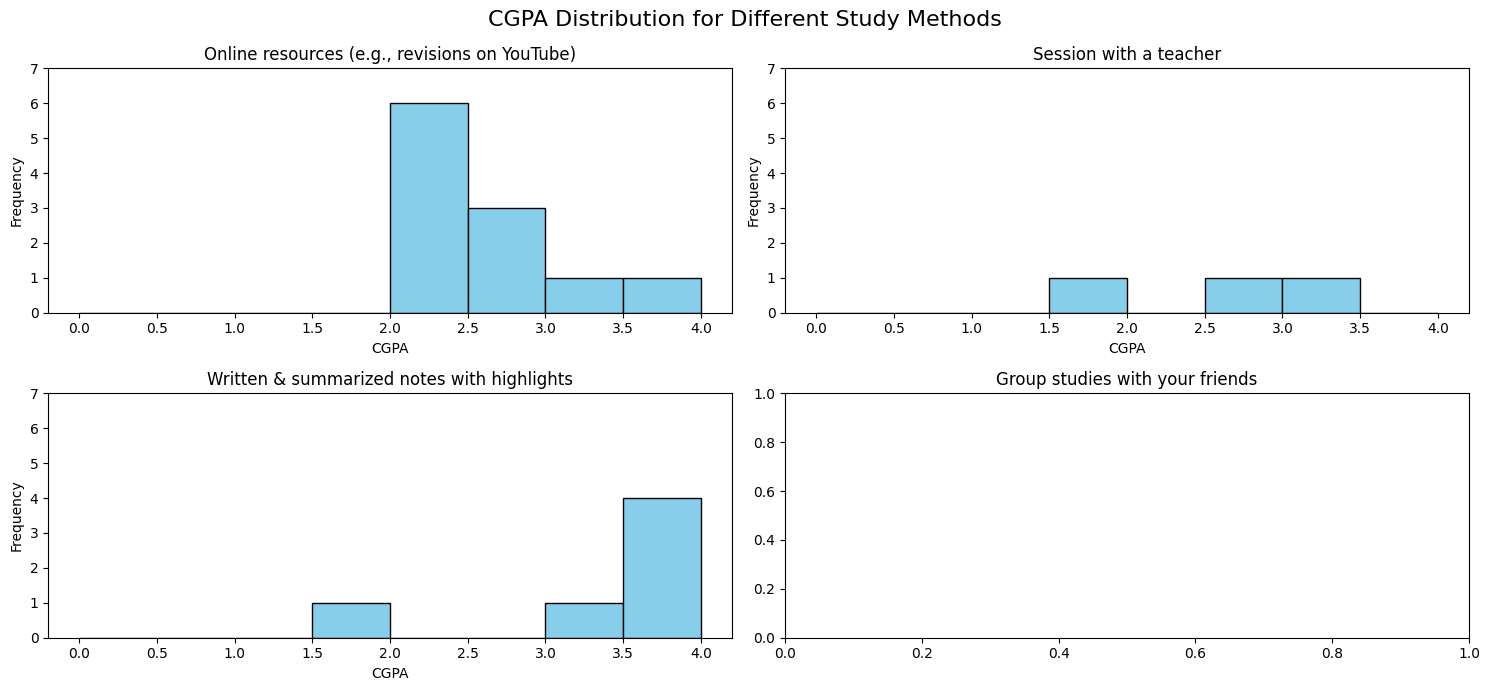

In [5]:
# Histograms part for visualizing the "CGPA Distribution for Different Study Methods"
grouped_df = df.groupby("Study Method")
# fig holds a reference to the figure object, axes is an array of axes objects (subplots)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7)) 
for ax, (study_method, data) in zip(axes.flatten(), grouped_df):
    data["CGPA"].plot(kind="hist", ax=ax, color="skyblue", edgecolor="black", bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
    ax.set_xlabel("CGPA")
    ax.set_ylabel("Frequency")
    ax.set_title(study_method)
    ax.set_ylim(0, 7) 

axes[1][1].set_title("Group studies with your friends") # set the title for the last method that is not used by any student!
fig.suptitle("CGPA Distribution for Different Study Methods", fontsize=16)
plt.tight_layout()
plt.show()

Kruskal-Wallis p-value: 0.1188579587599983


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

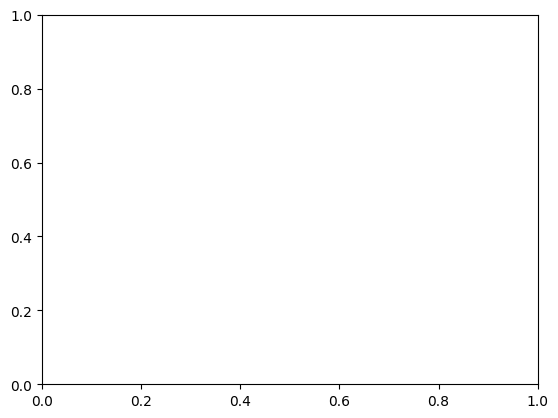

In [13]:
# Statistical analysis part using Kruskal-Wallis test:
# Kruskal-Wallis test does not assume normality of data within each group
""" the kruskal() function expects multiple arrays as arguments, each representing the data for a different group. 
Therefore, the * operator is used to unpack the list of "CGPA" columns into separate arguments, 
ensuring that each group"s data is passed as an individual array to the kruskal() function. """
kruskal_p_value = stats.kruskal(*[data["CGPA"] for study_method, data in df.groupby("Study Method")])
print("Kruskal-Wallis p-value:", kruskal_p_value.pvalue)

# sns.boxplot()
plt.boxplot(x="Study Method", data=df, showmeans=True)
plt.figure(figsize=(8,6))
plt.xlabel("Study Method")
plt.ylabel("CGPA")
plt.title(f"Boxplot of CGPA Across Study Methods\nKruskal-Wallis p-value: {kruskal_p_value.pvalue:.2f}")
plt.show()